In [1]:
from pathlib import Path
from dataclasses import dataclass
import os

os.getcwd()
os.chdir("C:\\Users\somit\Downloads\project_ineuron\insurence_premium_prediction")
os.getcwd()

'C:\\Users\\somit\\Downloads\\project_ineuron\\insurence_premium_prediction'

In [2]:
from insurence_premium.constant import *
from insurence_premium.util.common import read_yaml ,create_directories
from pathlib import Path
from insurence_premium.components import DataIngestion

In [3]:
@dataclass(frozen=True)
class DataIngestionConfig:
    root_dir: Path
    raw_data: Path
    ingested_train_dir: Path
    ingested_test_dir: Path

In [4]:
class ConfigurationManager:
    def __init__(
        self ,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH):

        self.config =read_yaml(config_filepath)
        self.params =read_yaml(params_filepath)

        create_directories([self.config.artifacts_root])
    
    def get_data_ingestion_config(self)->DataIngestionConfig:
        ingestion_config =self.config.data_ingestion
        data_ingestion_config = DataIngestionConfig(
            root_dir=Path(ingestion_config.root_dir),
            raw_data=Path(ingestion_config.raw_data),
            ingested_train_dir=Path(ingestion_config.ingested_train_dir),
            ingested_test_dir =Path(ingestion_config.ingested_test_dir)
        )
        return data_ingestion_config

        

In [17]:
con_obj=ConfigurationManager()
con_obj.get_data_ingestion_config()

DataIngestionConfig(root_dir=WindowsPath('artifacts/data_ingestion'), raw_data=WindowsPath('artifacts/data_ingestion/raw_data/insurence.csv'), ingested_train_dir=WindowsPath('data_ingestion/train/insurence.csv'), ingested_test_dir=WindowsPath('data_ingestion/test/insurence.csv'))

In [18]:
data_ingestion_config=con_obj.get_data_ingestion_config()
file_path=data_ingestion_config.raw_data

In [19]:
import os

class DataIngestion:
    def __init__(self , config:DataIngestionConfig):
        self.config =config

    def download_data(self):
        try:
            raw_data = self.config.raw_data
            raw_data_dir ,file_name=os.path.split(raw_data)

            os.makedirs(raw_data_dir , exist_ok = True)
            
            raw_data_file_path =os.path.join(
                raw_data_dir , file_name
            ) 
            db_file_path = DB_FILE_PATH

            df=CassandraDatabaseManager(db_file_path=db_file_path).data_finder()
            df.to_csv(raw_data_file_path) 
            return raw_data_file_path

        except Exception as e:
            raise e

    def clean_data(self):
        try:
            pass
        except Exception as e:
            raise PremiException(e,sys) from e
            

In [5]:
from insurence_premium.cassandra_db.cassandra_db import CassandraDatabaseManager

In [6]:
try:
    con_obj=ConfigurationManager()
    data_ingestion_config=con_obj.get_data_ingestion_config()
    data =DataIngestion(config=data_ingestion_config)
    data.download_data()
    data.split_data_as_train_test()
    
except Exception as e:
    raise e    

In [12]:
data_ingestion_config.ingested_test_dir

WindowsPath('data_ingestion/test/insurence.csv')

In [6]:
import pandas as pd
df=pd.read_csv("C:\\Users\\somit\\Downloads\\project_ineuron\\insurence_premium_prediction\\artifacts\\data_ingestion\\raw_data\\insurence.csv" ,index_col='Unnamed: 0')

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for i in df['region'].unique():
    df_=df[df['region']==i]
    print(f"this is for: {i} region")
    print(df_['sex'].value_counts())
    print("-------------------------------------")


this is for: northwest region
female    164
male      160
Name: sex, dtype: int64
-------------------------------------
this is for: northeast region
male      163
female    161
Name: sex, dtype: int64
-------------------------------------
this is for: southwest region
male      163
female    162
Name: sex, dtype: int64
-------------------------------------
this is for: southeast region
male      189
female    175
Name: sex, dtype: int64
-------------------------------------


In [ ]:
x=df.iloc[: ,:-1]
y =df['expenses']

In [7]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [9]:
from sklearn import preprocessing
  
#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['region_cat'] =label_encoder.fit_transform(df['region'])
df['region_cat'].head()

0    1
1    0
2    3
3    3
4    3
Name: region_cat, dtype: int32

In [10]:
df['region_cat']=df['region_cat'] +1

In [ ]:
df['region_cat'].head()

0    2
1    1
2    4
3    4
4    4
Name: region_cat, dtype: int32

In [11]:
df["region_label"] = pd.cut(
df["region_cat"],
bins=[0,1,2,3,4],
labels=[1,2,3,4]
)

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index,test_index in split.split(df, df["region_label"]):
    strat_train_set = df.loc[train_index].drop(["region_cat","region_label"],axis=1)
    strat_test_set = df.loc[test_index].drop(["region_cat","region_label"],axis=1)

In [19]:
strat_test_set.to_csv(file)

In [16]:
file=Path("artifacts/res/train/insurence.csv")

In [17]:
create_directories([file])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
df.head(2)

,Unnamed: 0,age,sex,bmi,children,smoker,region,expenses,region_cat,region_label
0,0,28,female,25.9,1,no,northwest,4133.64,2,2
1,1,24,female,20.5,0,yes,northeast,14571.89,1,1


In [ ]:
y=np.array(y)
y

array([[ 4133.64, 14571.89, 27941.29, ...,  7624.63,  5488.26, 34439.86]])

In [ ]:
y

0        4133.64
1       14571.89
2       27941.29
3        1526.31
4       37079.37
          ...   
1332    15612.19
1333     8269.04
1334     7624.63
1335     5488.26
1336    34439.86
Name: expenses, Length: 1337, dtype: float64

In [ ]:
df.set_index('Unnamed')

KeyError: "None of ['Unnamed'] are in the columns"

In [ ]:
strat_train_set.head()

NameError: name 'strat_train_set' is not defined

In [ ]:
strat_test_set.region.value_counts()

southeast    73
northwest    65
northeast    65
southwest    65
Name: region, dtype: int64

<AxesSubplot:xlabel='region_cat', ylabel='age'>

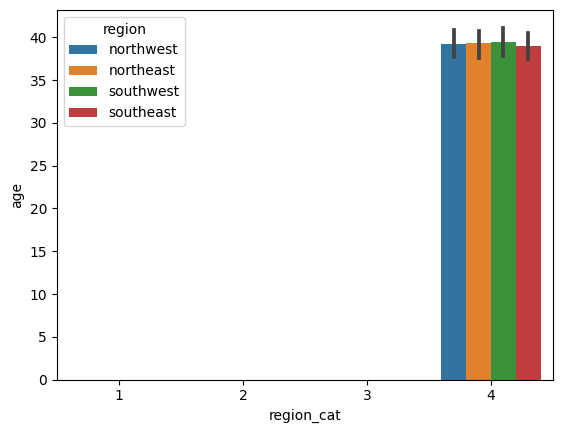

In [ ]:
import seaborn as sns
df["age"].value_counts()
sns.barplot(x=df['region_cat'],y=df['age'] ,hue=df['region'])

In [ ]:
for train_index,test_index in split.split(housing_data_frame, housing_data_frame["income_cat"]):
    
    strat_train_set = housing_data_frame.loc[train_index].drop(["income_cat"],axis=1)
    strat_test_set = housing_data_frame.loc[test_index].drop(["income_cat"],axis=1)

In [ ]:
from insurence_premium.entity.config_entity import DataIngestionConfig

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df.dtypes

Unnamed: 0      int64
age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
expenses      float64
dtype: object

In [ ]:
df.describe()

,Unnamed: 0,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,668.000000,39.222139,30.665520,1.095737,13279.121638
std,386.102966,14.044333,6.100664,1.205571,12110.359657
min,0.000000,18.000000,16.000000,0.000000,1121.870000
25%,334.000000,27.000000,26.300000,0.000000,4746.340000
50%,668.000000,39.000000,30.400000,1.000000,9386.160000
75%,1002.000000,51.000000,34.700000,2.000000,16657.720000
max,1336.000000,64.000000,53.100000,5.000000,63770.430000


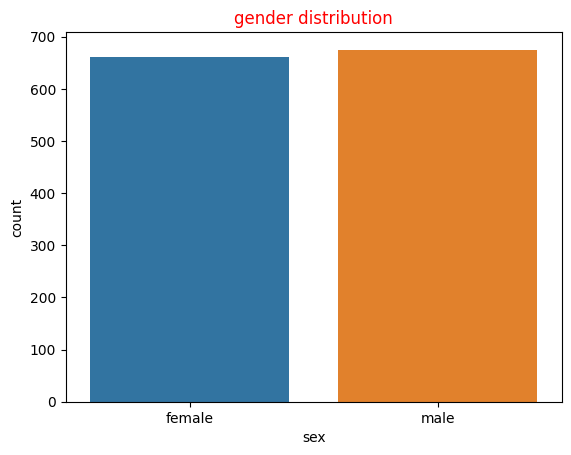

In [ ]:
sns.countplot(x='sex' ,data=df)
plt.title("gender distribution" ,color="red")
plt.show()

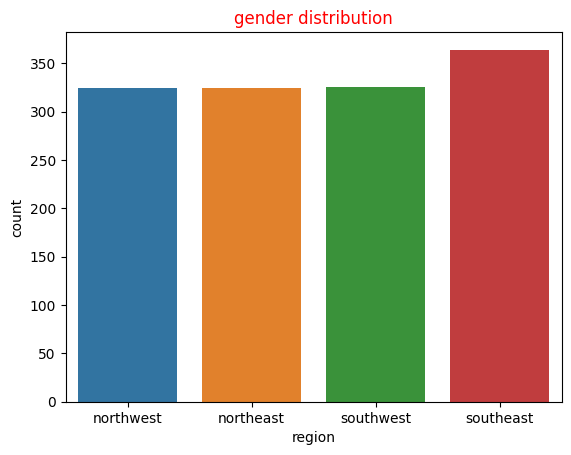

In [ ]:
sns.countplot(x='region' ,data=df)
plt.title("gender distribution" ,color="red")
plt.show()

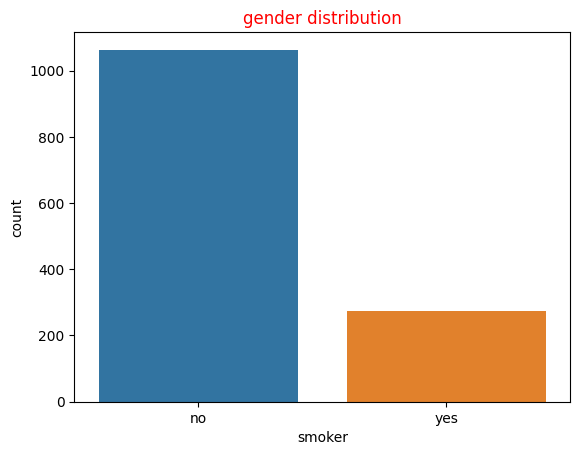

In [ ]:
sns.countplot(x='smoker' ,data=df)
plt.title("gender distribution" ,color="red")
plt.show()

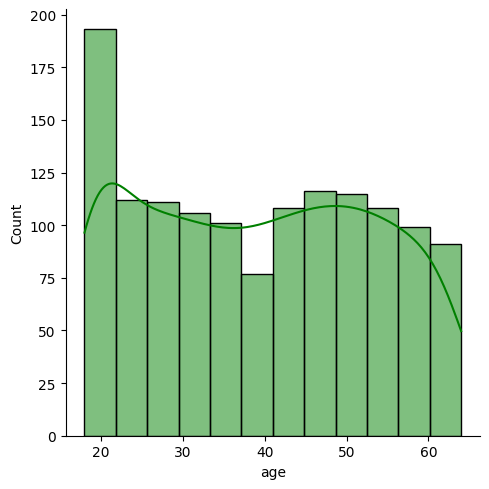

In [ ]:
sns.displot(df['age'] ,kde=True ,color="green")

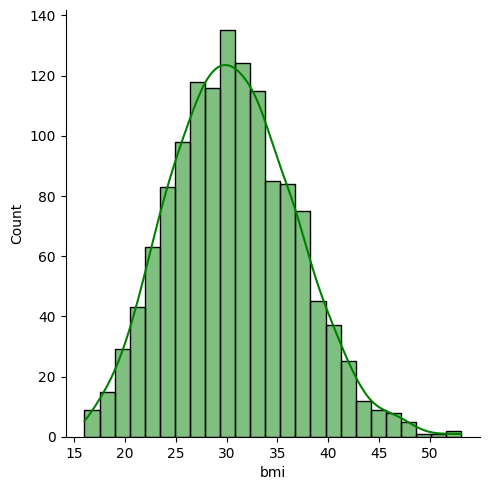

In [ ]:
sns.displot(df['bmi'] ,kde=True ,color='g')

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

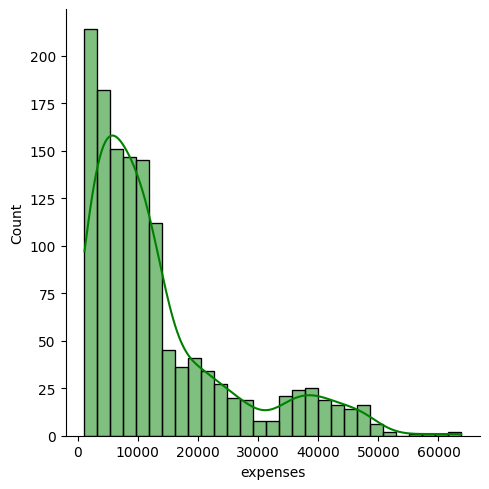

In [ ]:
sns.displot(df['expenses'] ,kde=True ,color='g')

plt.show()

In [ ]:
df.loc[df['expenses']==df['expenses']. ,'age']

Series([], Name: age, dtype: int64)

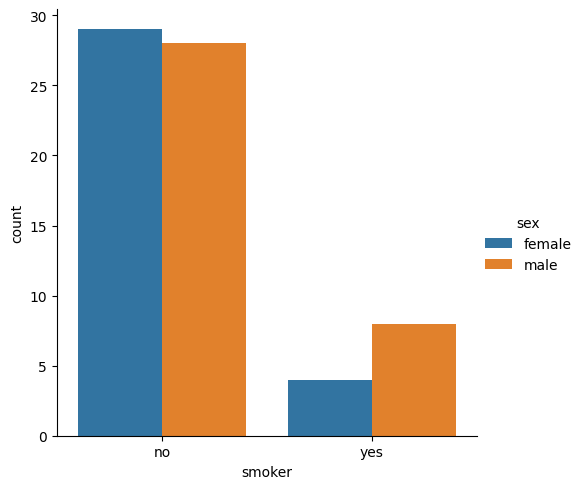

In [ ]:
sns.catplot(x="smoker",kind="count",hue='sex',data=df[df['age']==18])

<AxesSubplot:xlabel='sex', ylabel='expenses'>

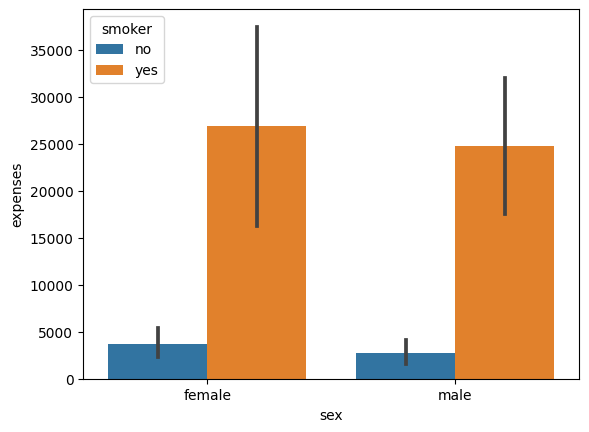

In [ ]:
sns.barplot(x='sex' ,y='expenses' ,hue='smoker' ,data=df[df.age==18])

<AxesSubplot:xlabel='sex', ylabel='expenses'>

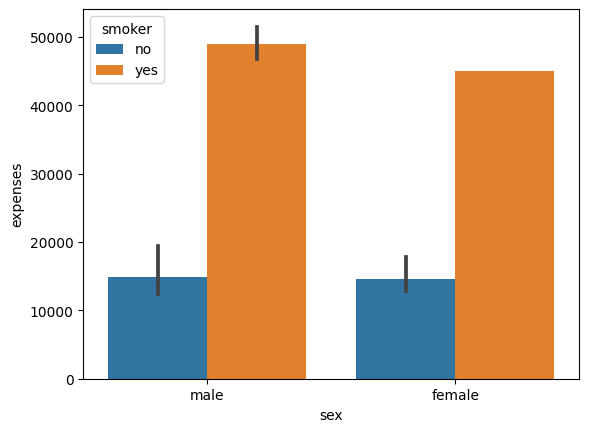

In [ ]:
sns.barplot(x="sex" ,y="expenses" ,hue="smoker" ,data=df[df.age==60])

In [ ]:
df.groupby('region')['expenses'].max()

region
northeast    58571.07
northwest    60021.40
southeast    63770.43
southwest    52590.83
Name: expenses, dtype: float64

<AxesSubplot:xlabel='region', ylabel='expenses'>

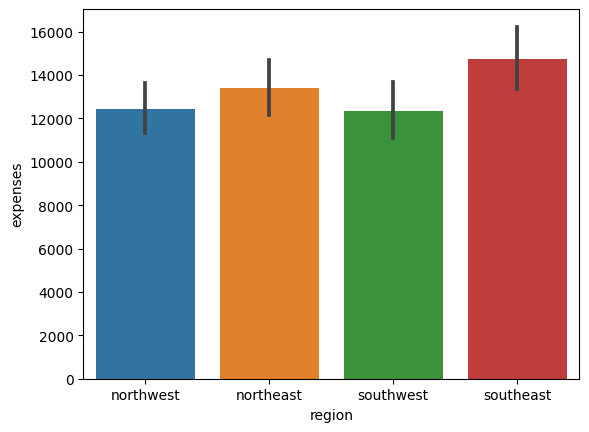

In [ ]:
sns.barplot(x='region' ,y='expenses',data=df)

<AxesSubplot:xlabel='sex', ylabel='expenses'>

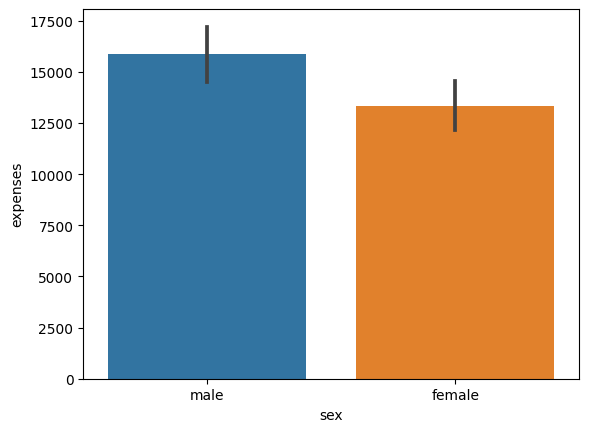

In [ ]:
sns.barplot(x='sex' ,y='expenses',data=df[df['bmi']>=28])

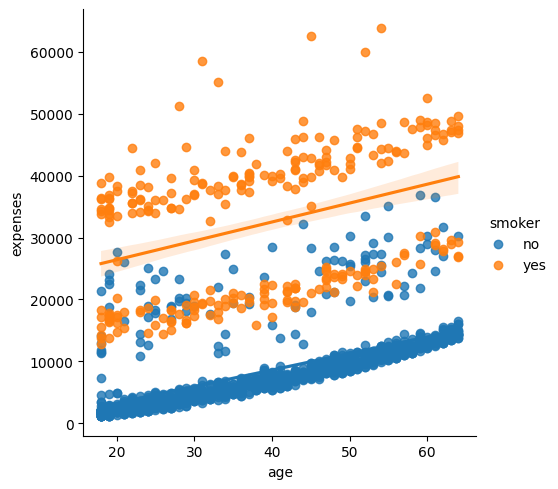

In [ ]:
sns.lmplot(x='age' ,y='expenses' ,hue='smoker' ,data=df)